<a href="https://colab.research.google.com/github/Kumarkashish511/Topsis_for_Pretrained-Models/blob/main/Topsis_for_Pretrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Model  TOPSIS Score  Rank
0  LLaMA-2 Chat      0.735216   1.0
1       GPT-3.5      0.701114   2.0
2    Gemini 1.5      0.391655   3.0
3      Claude 3      0.324865   4.0
4         GPT-4      0.257173   5.0


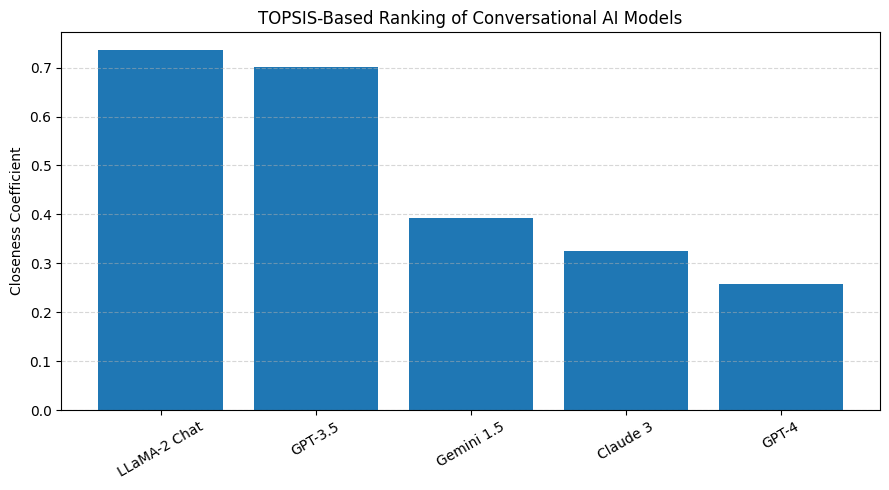

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_names = ["GPT-3.5", "GPT-4", "Gemini 1.5", "LLaMA-2 Chat", "Claude 3"]

data = np.array([
    [8.2, 7.3, 580, 0.003, 7.2],
    [9.6, 9.1, 920, 0.028, 9.1],
    [8.8, 8.4, 770, 0.018, 8.6],
    [8.1, 7.6, 520, 0.001, 7.3],
    [9.3, 9.4, 810, 0.024, 9.6]
])

weights = np.array([0.30, 0.25, 0.15, 0.15, 0.15])
criteria = np.array([1, 1, 0, 0, 1])

def topsis(matrix, weights, criteria_type):
    norm = matrix / np.linalg.norm(matrix, axis=0)
    weighted = norm * weights

    ideal_best = np.zeros(weighted.shape[1])
    ideal_worst = np.zeros(weighted.shape[1])

    for i in range(weighted.shape[1]):
        if criteria_type[i] == 1:
            ideal_best[i] = weighted[:, i].max()
            ideal_worst[i] = weighted[:, i].min()
        else:
            ideal_best[i] = weighted[:, i].min()
            ideal_worst[i] = weighted[:, i].max()

    d_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    d_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

    score = d_worst / (d_best + d_worst)
    return score

scores = topsis(data, weights, criteria)

df = pd.DataFrame({
    "Model": model_names,
    "TOPSIS Score": scores
})

df["Rank"] = df["TOPSIS Score"].rank(method="dense", ascending=False)
df = df.sort_values("TOPSIS Score", ascending=False).reset_index(drop=True)

print(df)

plt.figure(figsize=(9, 5))
plt.bar(df["Model"], df["TOPSIS Score"])
plt.title("TOPSIS-Based Ranking of Conversational AI Models")
plt.ylabel("Closeness Coefficient")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()